In [3]:
import ipyvolume as ipv
import tyssue
import json
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import random
import sys
import logging
import tyssue.io.hdf5 as hdf5
from IPython.display import Image
from scipy import optimize
from tyssue.draw import sheet_view

from tyssue import Sheet
from tyssue import SheetGeometry

##### Own functions
import src.cellDivisionOld as cellDivisionOld
import src.cellDivision as cellDivision
import src.vertexModel as vertexModel
import src.inputMechanicalParameters as inputMechanicalParameters
import src.auxFunctions as auxFunctions
from tyssue.topology import add_vert

from tyssue.topology.base_topology import add_vert, close_face, collapse_edge, remove_face
from tyssue.topology.base_topology import split_vert as base_split_vert

/Users/v_lachina/PycharmProjects/pythonProject/src/auxFunctions.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_ECM'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_ECM'][edge]
/Users/v_lachina/PycharmProjects/pythonProject/src/auxFunctions.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cellmap.edge_df['length_elasticity_FRC'][opposite_edge_indices] = cellmap.edge_df['length_elasticity_FRC'][edge]
/Users/v_lachina/PycharmProjects/pythonProject/src/auxFunctions.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See

Topology changed!


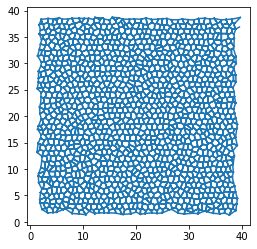

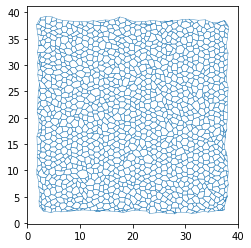

In [4]:
#### Initialize Model
[cellmap_init, geom, energyContributions_model] = vertexModel.initialize()

## Update mechanical parameters
cellmap_init = inputMechanicalParameters.update(cellmap_init)

## Initial stage
energyContributions_model.compute_energy(cellmap_init)

## RUN
[cellmap_H, geom, model_H, history_H] = vertexModel.solveEuler(cellmap_init, geom, energyContributions_model, endTime = 100)


fig, ax = sheet_view(cellmap_H, ['y', 'x'], edge={"color":1, 'colormap': 'Greys'})
#auxFunctions.create_frames(history_H, './results', edge={'color':'black'})
#auxFunctions.exportToMesh(history_H, './results')

import warnings
warnings.filterwarnings("ignore")

In [5]:
cellmap_H, new_edges_indices, new_opp_edges_indices, new_vertices_indices = cellDivision.ln_divide_FRCs(cellmap_H, "length", 1, energyContributions_model)

40
Chosen edge: 3528
New vert: 2772
New Edge: 8164
New opposite edge: 8165
1
Chosen edge: 3240
New vert: 2773
New Edge: 8166
New opposite edge: 8167
2
Chosen edge: 6540
New vert: 2774
New Edge: 8168
New opposite edge: 8169
3
Chosen edge: 3502
New vert: 2775
New Edge: 8170
New opposite edge: 8171
4
Chosen edge: 7796
New vert: 2776
New Edge: 8172
New opposite edge: 8173
5
Chosen edge: 3767
New vert: 2777
New Edge: 8174
New opposite edge: 8175
6
Chosen edge: 139
New vert: 2778
New Edge: 8176
New opposite edge: 8177
7
Chosen edge: 7046
New vert: 2779
New Edge: 8178
New opposite edge: 8179
8
Chosen edge: 7225
New vert: 2780
New Edge: 8180
New opposite edge: 8181
9
Chosen edge: 5646
New vert: 2781
New Edge: 8182
New opposite edge: 8183
10
Chosen edge: 7326
New vert: 2782
New Edge: 8184
New opposite edge: 8185
Topology changed!
11
Chosen edge: 2715
New vert: 2783
New Edge: 8186
New opposite edge: 8187
12
Chosen edge: 7612
New vert: 2784
New Edge: 8188
New opposite edge: 8189
13
Chosen edge: 6

In [6]:
mother_cells = cellmap_H.edge_df.loc[new_edges_indices]['face'].tolist()
edges_a = cellmap_H.edge_df.loc[new_edges_indices].index.tolist()

In [15]:
cellmap_H.edge_df.loc[edges_a]

,trgt,nz,length,face,srce,dx,dy,sx,sy,tx,...,ry,sub_area,is_active,length_elasticity,prefered_length,uz,length_elasticity_ECM,length_elasticity_FRC,color_edges,edge_width
8164,2362,0.363569,0.683420,317,2772,-0.634154,-0.254778,22.118182,10.605977,21.484028,...,0.461322,0.181785,1,612.993634,0.640213,0.57735,46.309838,188.894599,1,4
8166,1477,0.568776,0.766284,793,2773,0.061591,-0.763805,11.324560,23.027491,11.386152,...,0.098404,0.284388,1,172.942596,0.639068,0.57735,42.863719,43.359626,1,4
8168,2416,0.223278,0.813174,133,2774,-0.751295,0.311139,24.952725,5.042211,24.201430,...,0.374034,0.111639,1,161.378975,0.639344,0.57735,41.074398,40.101526,1,4
8170,438,0.369536,0.750947,993,2775,-0.432784,-0.613693,23.355118,28.655133,22.922334,...,0.527499,0.184768,1,250.736908,0.638197,0.57735,46.227902,68.169669,1,4
8172,206,0.517910,0.767030,886,2776,0.766459,0.029574,30.153854,24.006498,30.920313,...,-0.669483,0.258955,1,188.657234,0.638764,0.57735,49.153843,46.501130,1,4
8174,2516,0.231822,0.553801,1025,2777,0.004219,0.553784,18.626222,29.060150,18.630441,...,0.058588,0.115911,1,311.371685,0.638060,0.57735,42.711142,89.553514,1,4
8176,2563,0.221941,0.702347,329,2778,-0.300285,-0.634917,34.156287,9.740015,33.856002,...,-0.170535,0.110970,1,137.563651,0.637912,0.57735,53.263513,28.100046,1,4
8178,2114,0.280811,0.688705,877,2779,0.106526,-0.680417,20.358990,25.214821,20.465516,...,0.151611,0.140406,1,389.243209,0.637797,0.57735,57.840999,110.467403,1,4
8180,2588,0.402560,0.773665,470,2780,-0.753333,0.176200,26.909304,14.493347,26.155971,...,0.451893,0.201280,1,128.661519,0.637297,0.57735,40.231579,29.476647,1,4
8182,934,0.313605,0.422519,1165,2781,0.396730,0.145353,8.100659,32.431796,8.497389,...,-0.740968,0.156802,1,255.703368,0.142949,0.57735,46.484827,209.218541,1,4


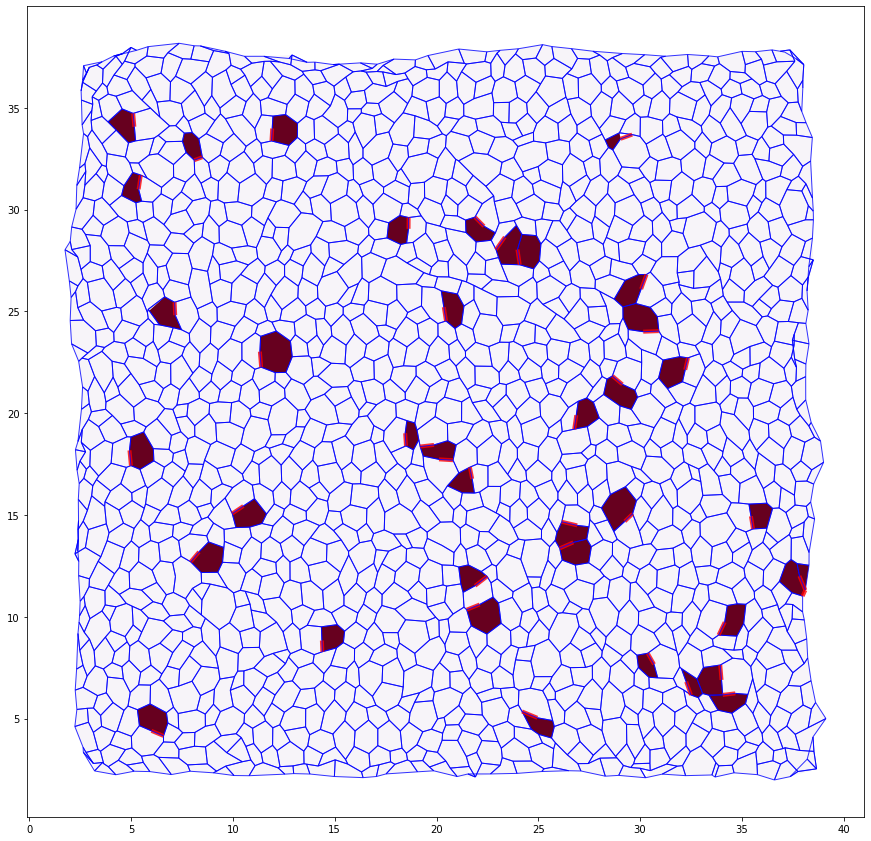

In [ ]:
auxFunctions.colour_face_edge(cellmap_H, mother_cells, edges_a)

In [11]:
cellmap_H.edge_df.loc[edges_a]['length'].tolist()

[0.6834200161216175,
 0.7662844528923819,
 0.8131739852197444,
 0.7509474452232938,
 0.7670297678612872,
 0.5538005141766064,
 0.7023468046772618,
 0.6887048957358756,
 0.7736645975568908,
 0.4225186493372453,
 0.6053647897275766,
 0.7056020467099845,
 0.6343119461508997,
 0.7497720412339778,
 0.7536783609984326,
 0.3205113153393626,
 0.6902585761332127,
 0.6276029025978219,
 0.7453364360548742,
 0.6424812741744177,
 0.6917012360650486,
 0.7622138444617015,
 0.6579171533456415,
 0.7532841112112644,
 0.694507979487824,
 0.6299158690335098,
 0.6426287515034341,
 0.6586161344918264,
 0.5835757574283236,
 0.5343257246454644,
 0.684482716374958,
 0.6017467054021437,
 0.621890082038658,
 0.734786678900199,
 0.6369153746948433,
 0.6213651622874159,
 0.725177483488149,
 0.6109406451854272,
 0.5501317694053394,
 0.6220423423183251]

In [12]:
cellmap_H.edge_df.loc[edges_a]['length'].mean()

0.6603744084923064

In [ ]:
#auxFunctions.colour_face_edge(cellmap_H, 129, 1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


cellmap_H.edge_df["color_edges"] = 0
cellmap_H.edge_df['edge_width'] = 1

    
cellmap_H.edge_df.loc[new_edges_indices, "color_edges"] = 256
cellmap_H.edge_df.loc[new_edges_indices, 'edge_width'] = 4




specs = {
    'face': {
        'visible': False,
    },
    'edge': {
            'visible': True,
            'color': cellmap_H.edge_df['color_edges'],
            'colormap': 'coolwarm',
            'width' : cellmap_H.edge_df['edge_width'],
    },
    'vert': {
        'visible': True,
        'color' : '#000a4b',
        's' : 20,
    }
}



fig, ax = sheet_view(cellmap_H, **specs)
fig.set_size_inches((15, 15))

ax.set_facecolor('#EFEFEF')  # Set background color to light gray


# Add grid lines
ax.grid(True, linestyle='--', linewidth=0.5, color='gray')

#ax.set_zorder(0)  # Set a lower zorder value to move the background to the back

plt.title('Spatial distribution of daughter FRCs', fontsize = 20)

plt.show()




In [ ]:
def find_edges_a_and_b(sheet, mother):
    
    ### find edges_a == new edges 
    edges_a = cellmap_H.edge_df.loc[new_edges_indices].index.tolist()
    
    ### find edge_a for each mother cell
    print("Mother cell: ", mother)
    mother_cell_edges = cellmap_H.edge_df[cellmap_H.edge_df['face'] == mother].index.tolist()
    
    edge_a = None
    edge_b = None
    
    for edge in mother_cell_edges:
        if edge in edges_a:
            edge_a = edge
            print("Chosen edge_a:", edge_a)
    if edge_a is None:
        print("No edge_a found in the given mother cell.")
        
    ### find edge_b for each mother cell
    remaining_edges = [edge for edge in mother_cell_edges if edge not in edges_a]
        

    attempts = 0

    while remaining_edges and attempts < 100:

        # Choose edge_b randomly from the remaining edges
        potential_edge_b = random.choice(remaining_edges)
        print(potential_edge_b)
        if (cellmap_H.edge_df.loc[potential_edge_b]["srce"] != cellmap_H.edge_df.loc[edge_a]["trgt"]) & (cellmap_H.edge_df.loc[potential_edge_b]["trgt"] != cellmap_H.edge_df.loc[edge_a]["srce"]):
            edge_b = potential_edge_b
            print("Chosen edge_b:", edge_b) 
            break
        
        remaining_edges.remove(potential_edge_b)
        attempts += 1

    if edge_b is None:
        print("No edge_b found in the given mother cell.")
                
    return edge_a, edge_b

In [ ]:
def ln_divide_FRC_random_angle(sheet, edge):
    """Adds a vertex in the middle of the edge,

    which is split as is its opposite(s)

    Parameters
    ----------
    sheet : a :class:`Epithelium` instance
    edge : int
    the index of one of the half-edges to split

    Returns
    -------
    new_vert : int
    the index to the new vertex
    new_edges : int or list of ints
    index to the new edge(s). For a sheet, returns
    a single index, for a 3D epithelium, returns
    the list of all the new parallel edges
    new_opp_edges : int or list of ints
    index to the new opposite edge(s). For a sheet, returns
    a single index, for a 3D epithelium, returns
    the list of all the new parallel edges


    In the simple case whith two half-edge, returns
    indices to the new edges, with the following convention:

    s    e    t
      ------>
    * <------ *
    oe

    s    e       ne   t
      ------   ----->
    * <----- * ------ *
        oe   nv   noe

    where "e" is the passed edge as argument, "s" its source "t" its
    target and "oe" its opposite. The returned edges are the ones
    between the new vertex and the input edge's original target.
    """
    
    

    srce, trgt = sheet.edge_df.loc[edge, ["srce", "trgt"]]
    
    logger = logging.getLogger(name=__name__)
    logger.debug(f"adding vertex between {srce} and {trgt}")
    opposites = sheet.edge_df[
        (sheet.edge_df["srce"] == trgt) & (sheet.edge_df["trgt"] == srce)
    ]
    parallels = sheet.edge_df[
        (sheet.edge_df["srce"] == srce) & (sheet.edge_df["trgt"] == trgt)
    ]

    new_vert = sheet.vert_df.loc[srce:srce]
    sheet.vert_df = pd.concat([sheet.vert_df, new_vert], ignore_index=True)
    new_vert = sheet.vert_df.index[-1]
    
    random_weight = random.uniform(0, 1)

    # Calculate the new coordinates as a weighted average of the source and target coordinates
    sheet.vert_df.loc[new_vert, sheet.coords] = (
    random_weight * sheet.vert_df.loc[srce, sheet.coords]
    + (1 - random_weight) * sheet.vert_df.loc[trgt, sheet.coords])

    sheet.edge_df.loc[parallels.index, "trgt"] = new_vert
    sheet.edge_df = pd.concat([sheet.edge_df, parallels], ignore_index=True)
    new_edges = sheet.edge_df.index[-parallels.index.size :]
    sheet.edge_df.loc[new_edges, "srce"] = new_vert
    sheet.edge_df.loc[new_edges, "trgt"] = trgt

    sheet.edge_df.loc[opposites.index, "srce"] = new_vert
    sheet.edge_df = pd.concat([sheet.edge_df, opposites], ignore_index=True)
    new_opp_edges = sheet.edge_df.index[-opposites.index.size :]
    sheet.edge_df.loc[new_opp_edges, "trgt"] = new_vert
    sheet.edge_df.loc[new_opp_edges, "srce"] = trgt

    # ## Sheet special case
    if len(new_edges) == 1:
        new_edges = new_edges[0]
    if len(new_opp_edges) == 1:
        new_opp_edges = new_opp_edges[0]
    elif len(new_opp_edges) == 0:
        new_opp_edges = None
    return new_vert, new_edges, new_opp_edges

In [ ]:
def face_division(sheet, mother, vert_a, vert_b):
    """
    Divides the face associated with edges
    indexed by `edge_a` and `edge_b`, splitting it
    in the middle of those edes.
    """
    # mother = sheet.edge_df.loc[edge_a, 'face']
    
    face_cols = sheet.face_df.loc[mother:mother]

    sheet.face_df = pd.concat([sheet.face_df, face_cols], ignore_index=True)
    sheet.face_df.index.name = "face"
    daughter = int(sheet.face_df.index[-1])

    edge_cols = sheet.edge_df[sheet.edge_df["face"] == mother].iloc[0:1]

    sheet.edge_df = pd.concat([sheet.edge_df, edge_cols, edge_cols], ignore_index=True)
    new_edge_m = sheet.edge_df.index[-2]
    sheet.edge_df.loc[new_edge_m, "srce"] = vert_b
    sheet.edge_df.loc[new_edge_m, "trgt"] = vert_a
    new_edge_d = sheet.edge_df.index[-1]
    sheet.edge_df.loc[new_edge_d, "srce"] = vert_a
    sheet.edge_df.loc[new_edge_d, "trgt"] = vert_b

    ### Discover daughter edges
    m_data = sheet.edge_df[sheet.edge_df["face"] == mother]
    daughter_edges = [new_edge_d]
    srce, trgt = vert_a, vert_b
    srces, trgts = m_data[["srce", "trgt"]].values.T
    spins = 0

    while trgt != vert_a:
        srce, trgt = trgt, trgts[srces == trgt][0]

        daughter_edges.append(
            m_data[(m_data["srce"] == srce) & (m_data["trgt"] == trgt)].index[0]
        )
        spins += 1
        if spins > m_data.shape[0]:
            raise ValueError(f"The face {mother} has an invalid topology, \n")
    sheet.edge_df.loc[daughter_edges, "face"] = daughter
    sheet.edge_df.index.name = "edge"
    
    ###Set ECM elasticity to 0 in new edges 
    
    sheet.edge_df.loc[new_edge_d, "length_elasticity_ECM"] = 0
    sheet.edge_df.loc[new_edge_m, "length_elasticity_ECN"] = 0
    
    ###Set Prefered length to mean length 
    
    new_prefered_length_FRC = sheet.edge_df["length"].mean()
    sheet.edge_df.loc[new_edge_d, "prefered_length"] = new_prefered_length_FRC
    sheet.edge_df.loc[new_edge_m, "prefered_length"] = new_prefered_length_FRC
    
    sheet.reset_topo()
    
    return daughter, daughter_edges, new_edge_d



In [ ]:
def find_vertices_of_face(cellmap_H, face_id):
    # Get the edges associated with the given face
    face_edges = cellmap_H.edge_df[cellmap_H.edge_df['face'] == face_id].index.tolist()
    
    # Extract unique vertices from the edges
    vertices = set()
    for edge_id in face_edges:
        edge = cellmap_H.edge_df.loc[edge_id]
        vertices.add(edge['srce'])
        vertices.add(edge['trgt'])
    
    return list(vertices)

In [ ]:
def cell_division(sheet, mother, geom, angle=None):
    """Causes a cell to divide

    Parameters
    ----------

    sheet : a 'Sheet' instance
    mother : face index of target dividing cell
    geom : a 2D geometry
    angle : division angle for newly formed edge

    Returns
    -------
    daughter: face index of new cell

    Notes
    -----
    - Function checks for perodic boundaries if there are, it checks if dividing cell
      rests on an edge of the periodic boundaries if so, it displaces the boundaries
      by a half a period and moves the target cell in the bulk of the tissue. It then
      performs cell division normally and reverts the periodic boundaries
      to the original configuration
    """
    
    if sheet.settings.get("boundaries") is not None:
        mother_on_periodic_boundary = False
        if (
            sheet.face_df.loc[mother]["at_x_boundary"]
            or sheet.face_df.loc[mother]["at_y_boundary"]
        ):
            mother_on_periodic_boundary = True
            saved_boundary = sheet.specs["settings"]["boundaries"].copy()
            for u, boundary in sheet.settings["boundaries"].items():
                if sheet.face_df.loc[mother][f"at_{u}_boundary"]:
                    period = boundary[1] - boundary[0]
                    sheet.specs["settings"]["boundaries"][u] = [
                        boundary[0] + period / 2.0,
                        boundary[1] + period / 2.0,
                    ]
            geom.update_all(sheet)

    if not sheet.face_df.loc[mother, "is_alive"]:
        logger.warning("Cell %s is not alive and cannot devide", mother)
        return
    edge_a, edge_b = find_edges_a_and_b(sheet, mother)
    if edge_a is None or edge_b is None:
        print("Skipping cell division due to missing edges.")
        return None, None, None

    ### find vertices associated with mother cell
    vertices_of_mother = find_vertices_of_face(sheet, mother)
    
    # Find the vertex in new_vertices_indices associated with the mother cell
    vert_a = None
    for vert in new_vertices_indices:
        if vert in vertices_of_mother:
            vert_a = vert
            break
    if vert_a is None:
        print("No vert_a found.")
        
    
    vert_b, *_ = ln_divide_FRC_random_angle(sheet, edge_b)
    sheet.vert_df.index.name = "vert"
    daughter, daughter_edges, new_edge_d = face_division(sheet, mother, vert_a, vert_b)

    if sheet.settings.get("boundaries") is not None and mother_on_periodic_boundary:
        sheet.specs["settings"]["boundaries"] = saved_boundary
        geom.update_all(sheet)
    geom.update_all(sheet)
    
    
    
    energyContributions_model.compute_energy(sheet)
    vertexModel.solveEuler(sheet, geom, energyContributions_model, 20)
    
    return daughter, daughter_edges, new_edge_d



In [ ]:
mother_cells

In [ ]:
daughter_cells = []
new_edge_hs = []
all_daughter_edges = []

for mother_cell in mother_cells:
   
    daughter, daughter_edges, new_edge_d = cell_division(cellmap_H, mother_cell, geom)
    daughter_cells.append(daughter)
    new_edge_hs.append(new_edge_d)
    all_daughter_edges.append(daughter_edges)

In [ ]:
auxFunctions.colour_face_edge(cellmap_H, daughter_cells, new_edge_hs)

In [ ]:
cellmap_H.edge_df.loc[edges_a]['length'].tolist()

In [ ]:
cellmap_H.edge_df.loc[edges_a]['length'].mean()

In [ ]:
cellmap_H.edge_df.loc[new_edge_hs, ['length_elasticity_ECM', 'length_elasticity_FRC', 'prefered_length']]